<a href="https://colab.research.google.com/github/Ahibala/Insurance-Premium-Prediction-/blob/main/Classification_Model__Decision_Tree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree.**

## Step 1 --> Data Gathering 

#### Downloading kaggle data sets direclty into colab 

In [ ]:
#Installing kaggle library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### upload kaggle.json file which contain the user kaggle detail 

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Make a directory for kaggle at the tempoary instacne location on colab drive 
! mkdir ~/.kaggle

!cp /gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/kaggle.json ~/.kaggle/kaggle.json

# change the file permission to read/write to the owner only 
!chmod 600 ~/.kaggle/kaggle.json  

### Download and the extract the datasets

In [ ]:
#Downlad the datasets
!kaggle datasets download noordeen/insurance-premium-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#Extracting the compressed data
!unzip insurance-premium-prediction.zip

unzip:  cannot find or open insurance-premium-prediction.zip, insurance-premium-prediction.zip.zip or insurance-premium-prediction.zip.ZIP.


## Step 2 -->  Data cleaning 

In [ ]:
# Importing librires 

import pandas as pd  #For analyzing, cleaning, exploring, and manipulating data.
import numpy as np   # Python library used for working with arrays

In [ ]:
# Loading the dataset to a pandas Dataframe 
df=pd.read_csv('/gdrive/MyDrive/project/Machine_Learning/Insurance_premium_prediction/insurance.csv')


In [ ]:
# To see first five rows of dataset
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
# To check how many rows and column we having 
df.shape

(1338, 7)

In [ ]:
#cheking for missing vaules
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
#summerizing the stats of the data
df.describe() 

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
# checking for data type for each column s
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#To get list of categorical variables

# List(dataset.select_dtypes(include=['object']).columns)  Method_1
check = (df.dtypes == 'object') #Method_2
categorical_var = list(check[check].index)

print(f"list of categorical variables {categorical_var}")

#Finding unique number and value in categorical data
for col in categorical_var:
    unique_no = df[col].nunique()
    unique_value = df[col].unique()
    print (f'Number of varibale in {col} are: {unique_no}, there are {unique_value}')



list of categorical variables ['sex', 'smoker', 'region']
Number of varibale in sex are: 2, there are ['female' 'male']
Number of varibale in smoker are: 2, there are ['yes' 'no']
Number of varibale in region are: 4, there are ['southwest' 'southeast' 'northwest' 'northeast']


## Step 3  --> Formatting the data for decision tree  

### Formating Data part 1 ---> converting the target numeric data to categorical data  

In [ ]:
#viweing current dataset
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:

# Create a new categorical feature 'expenses' based on quartiles
expense_labels = ['low', 'medium', 'high']

df['expenses'] = pd.qcut(df['expenses'], q=3, labels=expense_labels)

# Print the first few rows to verify the new feature
print(df.head())


   age     sex   bmi  children smoker     region expenses
0   19  female  27.9         0    yes  southwest     high
1   18    male  33.8         1     no  southeast      low
2   28    male  33.0         3     no  southeast      low
3   33    male  22.7         0     no  northwest     high
4   32    male  28.9         0     no  northwest      low


#### checking the data is balance data or not :


In [ ]:
# checking the data is balance data or not :
expenses_count = df['expenses'].value_counts(normalize=True)
print(expenses_count)

low       0.333333
medium    0.333333
high      0.333333
Name: expenses, dtype: float64


### Formating Data part 2 ---> converting the  ordinal categorical data into numeric 

In [ ]:
# convert ordinal catagorical variable into numerical

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'sex' feature
df['sex'] = le.fit_transform(df['sex'])

# Encode the 'smoker' feature
df['smoker'] = le.fit_transform(df['smoker'])

# Encode the 'region' feature
df['region'] = le.fit_transform(df['region'])

# Encode the 'expenses' feature
df['expenses'] = le.fit_transform(df['expenses'])

# Print to verify the encoded feature
print(df.head())



   age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3         0
1   18    1  33.8         1       0       2         1
2   28    1  33.0         3       0       2         1
3   33    1  22.7         0       0       1         0
4   32    1  28.9         0       0       1         1


### Formating Data part 3 ---> seperate data into testing and traning set

In [ ]:
from sklearn.model_selection import train_test_split

# Set the target variable (y) and the features (X)
X = df.drop('expenses', axis=1)
y = df['expenses']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=21)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1003, 6)
y_train shape: (1003,)
X_test shape: (335, 6)
y_test shape: (335,)


## Step 4 --> Building a prelimilary decision tree

### Build the tree part 1 ---> create the decision tree and train the dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating the decision tree and fit it to the training data 

dt = DecisionTreeClassifier(random_state=21)
dt=dt.fit(X_train, y_train)


### Build the tree part 2 ---> plot the decision tree

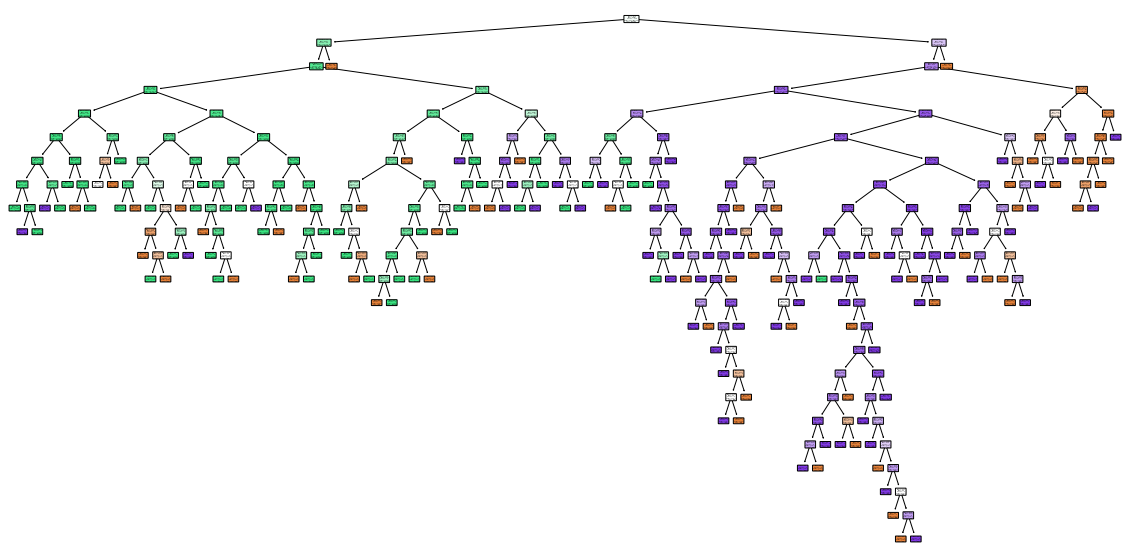

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree

fig, ax = plt.subplots(figsize=(20, 10))

tree.plot_tree(dt, feature_names=X.columns, class_names=['low', 'medium', 'high'], filled=True, rounded=True, ax=ax)
 
plt.show()

### Build the tree part 3 ---> plot the confusion matrix

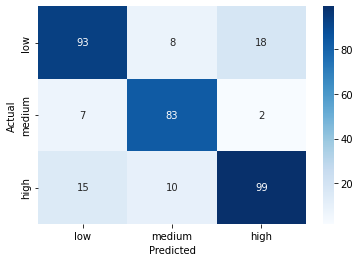

Accuracy: 0.8208955223880597
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       119
           1       0.82      0.90      0.86        92
           2       0.83      0.80      0.81       124

    accuracy                           0.82       335
   macro avg       0.82      0.83      0.82       335
weighted avg       0.82      0.82      0.82       335



In [ ]:
# plot the confusion matrix by runing the test data and calcaulate the accuracy of the model 

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# a confusion matrix 
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the accuracy and print the classification report

accuracy = accuracy_score(y_test, y_pred)

# ANSI escape codes for bold and green color in print (optional)
bold = "\033[1m"
green = "\033[32m"
reset = "\033[0m"

print(f"{bold}{green}Accuracy: {accuracy}{reset}")

print(classification_report(y_test, y_pred))


### Build the tree part 4 ---> plot the feature have more importance

age         0.447723
smoker      0.330310
bmi         0.103388
children    0.065667
region      0.043699
sex         0.009214
dtype: float64


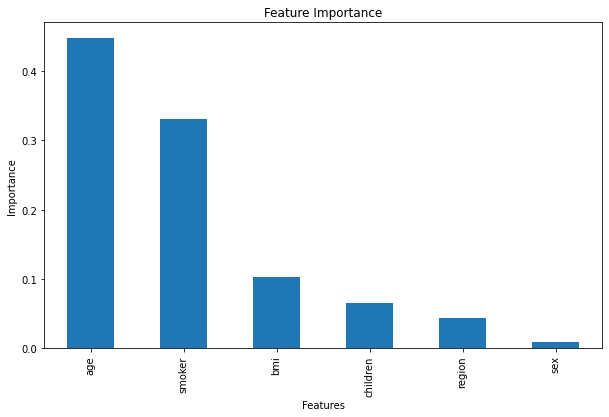

In [ ]:
# Get feature importances from the decision tree model
feature_importances = dt.feature_importances_

# Create a pandas Series with the feature importances and the column names
importances = pd.Series(feature_importances, index=X.columns)

# Sort the importances in descending order

sorted_importances = importances.sort_values(ascending=False)
print (sorted_importances)

# Plot the feature importances

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

## Step 5 --> optimizing the tree with pruning method

### optimizing part 1: Using hyper parameter tuning with cross-validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print (best_params)

# Train the final decision tree model
best_clf_1 = DecisionTreeClassifier(**best_params ,random_state=0)
best_clf_1.fit(X_train, y_train)

# a confusion matrix 
y_pred = best_clf_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy:  0.8746268656716418


#### After doing hyperparamter tuning --> new decision tree

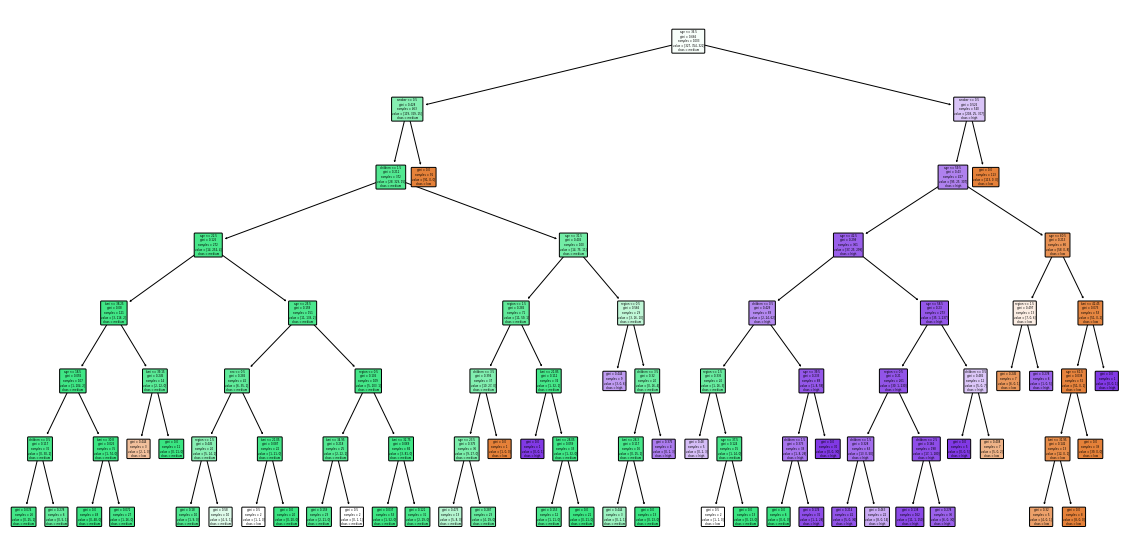

In [ ]:

# Plot the decision tree

fig, ax = plt.subplots(figsize=(20, 10))

tree.plot_tree(best_clf_1, feature_names=X.columns, class_names=['low', 'medium', 'high'], filled=True, rounded=True, ax=ax)
 
plt.show()

#### After doing hyperparamter tuning --> new confusion matrix

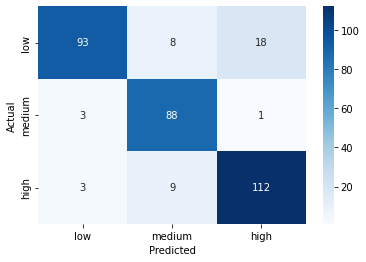

Accuracy: 0.8746268656716418
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       119
           1       0.84      0.96      0.89        92
           2       0.85      0.90      0.88       124

    accuracy                           0.87       335
   macro avg       0.88      0.88      0.88       335
weighted avg       0.88      0.87      0.87       335



In [ ]:
# plot the confusion matrix by runing the test data and calcaulate the accuracy of the model 

# a confusion matrix 
y_pred =best_clf_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the accuracy and print the classification report

accuracy = accuracy_score(y_test, y_pred)

# ANSI escape codes for bold and green color in print (optional)
bold = "\033[1m"
green = "\033[32m"
reset = "\033[0m"

print(f"{bold}{green}Accuracy: {accuracy}{reset}")

print(classification_report(y_test, y_pred))


### optimizing part 2: Using cost  complexity pruning with cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Apply cost complexity pruning to find the optimal alpha value
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Use cross-validation to find the best ccp_alpha
scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=0)
    score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    scores.append(score)

# Get the optimal alpha value
best_alpha = ccp_alphas[np.argmax(scores)]
print (best_alpha)

# Train the final decision tree model
best_clf = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)
best_clf=best_clf.fit(X_train, y_train)

# a confusion matrix 
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

0.002278877652756017
Accuracy:  0.8835820895522388


## Step 6 --> Building,interpreting and evaluting the final decision tree

### Final interpretation part 1 --> plot the decion tree 

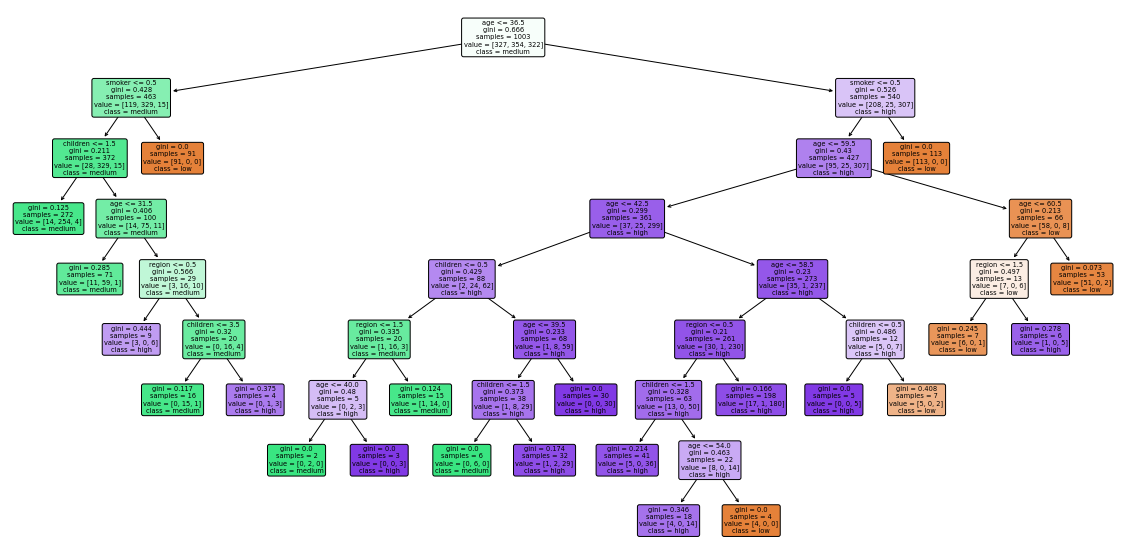

In [ ]:
# Plot the decision tree

fig, ax = plt.subplots(figsize=(20, 10))

tree.plot_tree(best_clf, feature_names=X.columns, class_names=['low', 'medium', 'high'], filled=True, rounded=True, ax=ax)
 
plt.show()

### Final interpretation part 2 --> plot the confusion matrix

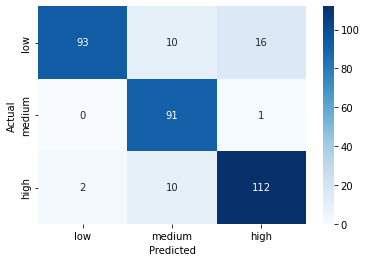

Accuracy: 0.8835820895522388
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       119
           1       0.82      0.99      0.90        92
           2       0.87      0.90      0.89       124

    accuracy                           0.88       335
   macro avg       0.89      0.89      0.88       335
weighted avg       0.89      0.88      0.88       335



In [ ]:
# plot the confusion matrix by runing the test data and calcaulate the accuracy of the model 

# a confusion matrix 
y_pred =best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['low', 'medium', 'high'], yticklabels=['low', 'medium', 'high'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate the accuracy and print the classification report

accuracy = accuracy_score(y_test, y_pred)

# ANSI escape codes for bold and green color in print (optional)
bold = "\033[1m"
green = "\033[32m"
reset = "\033[0m"

print(f"{bold}{green}Accuracy: {accuracy}{reset}")

print(classification_report(y_test, y_pred))

### Final interpretation part 3 ---> feature that have more importance from decision tree model

age         0.503969
smoker      0.407286
children    0.064975
region      0.023770
sex         0.000000
bmi         0.000000
dtype: float64


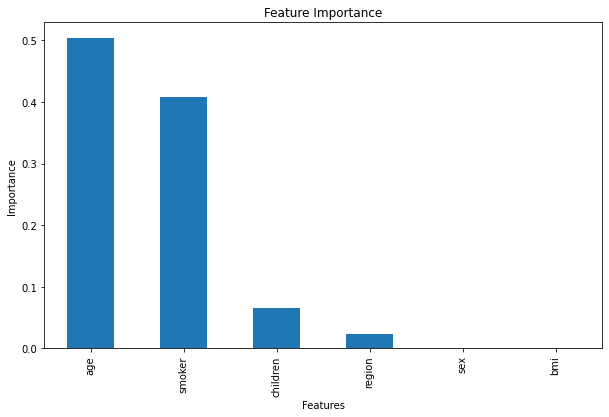

In [ ]:
# Get feature importances from the decision tree model
feature_importances = best_clf.feature_importances_

# Create a pandas Series with the feature importances and the column names
importances = pd.Series(feature_importances, index=X.columns)

# Sort the importances in descending order

sorted_importances = importances.sort_values(ascending=False)
print (sorted_importances)

# Plot the feature importances

plt.figure(figsize=(10, 6))
sorted_importances.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

## Optional step --> Use cross-validation to find the best cv value for cross validation

**During the cross validation, we want to mention number of folding that is "cv" value to perfrom that ,this value play significant result in getting the result therefore,it is neccessary to find optimal value by following method**

In [ ]:
# Apply cost complexity pruning to find the optimal alpha value
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Define a range of cv values to test
cv_values = range(2, 21)

# Store the results for each cv value
cv_results = []

for cv_value in cv_values:
    # Use cross-validation to find the best ccp_alpha
    scores = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=0)
        score = cross_val_score(best_clf, X_train, y_train, cv=cv_value).mean()
        scores.append(score)

    # Get the optimal alpha value
    best_alpha = ccp_alphas[np.argmax(scores)]

    # Train the final decision tree model
    best_clf = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)
    best_clf = best_clf.fit(X_train, y_train)

    # Calculate the accuracy
    y_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    cv_results.append((cv_value, best_alpha, accuracy))

# Convert the results to a DataFrame for easier visualization
cv_results_df = pd.DataFrame(cv_results, columns=['cv_value', 'best_alpha', 'accuracy'])

# Find the cv_value with the highest accuracy
best_cv_result = cv_results_df.loc[cv_results_df['accuracy'].idxmax()]
print("Best cv_value:", best_cv_result['cv_value'])
print("Best ccp_alpha:", best_cv_result['best_alpha'])
print("Best accuracy:", best_cv_result['accuracy'])


Best cv_value: 5.0
Best ccp_alpha: 0.002278877652756017
Best accuracy: 0.8835820895522388


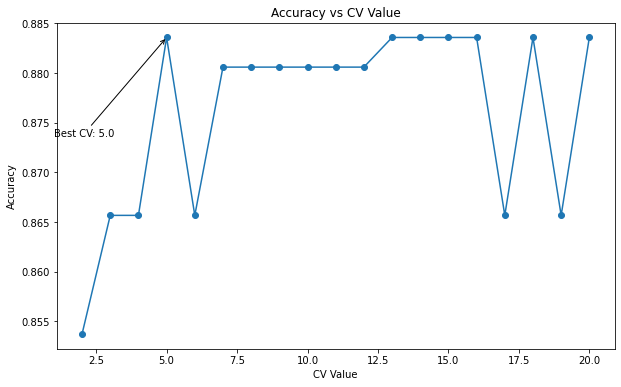

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(cv_results_df['cv_value'], cv_results_df['accuracy'], marker='o', linestyle='-')
plt.xlabel('CV Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs CV Value')

# Annotate the best cv_value
best_cv_value = best_cv_result['cv_value']
best_accuracy = best_cv_result['accuracy']
plt.annotate(
    f"Best CV: {best_cv_value}",
    xy=(best_cv_value, best_accuracy),
    xytext=(best_cv_value-4, best_accuracy-0.01),
    arrowprops=dict(facecolor='black', arrowstyle='->')
)

plt.show()


once you get **best cv value from cost comeplexity** pruing as mention in above you use **same cv value**  for hyper parameter tuning or as below this : 

In [ ]:
# Perform hyperparameter tuning with cross-validation
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy') # we are using the above best cv from above method where we get best cv =5 
grid_search.fit(X_train, y_train)

# Get the best combination of hyperparameters
best_params = grid_search.best_params_
print (best_params)

# Train the final decision tree model
best_clf_1 = DecisionTreeClassifier(**best_params ,random_state=0)
best_clf_1.fit(X_train, y_train)

# a confusion matrix 
y_pred = best_clf_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy: ", accuracy)

Accuracy:  0.8746268656716418


In [ ]:
# Perform hyperparameter tuning with cross-validation
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

cv_values = [3, 5, 7, 10]


best_cv = None
best_accuracy = 0
best_params = None

for cv in cv_values:
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best combination of hyperparameters
    params = grid_search.best_params_
    
    # Train the final decision tree model
    clf = DecisionTreeClassifier(**params, random_state=0)
    clf.fit(X_train, y_train)

    # Get the accuracy
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_cv = cv
        best_params = params

    print(f"CV: {cv}, Accuracy: {accuracy}, Params: {params}")

print(f"Best CV: {best_cv}, Best Accuracy: {best_accuracy}, Best Params: {best_params}")


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

CV: 3, Accuracy: 0.8567164179104477, Params: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

CV: 5, Accuracy: 0.8746268656716418, Params: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

CV: 7, Accuracy: 0.8746268656716418, Params: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

CV: 10, Accuracy: 0.8567164179104477, Params: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV: 5, Best Accuracy: 0.8746268656716418, Best Params: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


To balance bias and variance for the cv values, you can calculate the mean cross-validation score and its standard deviation for each cv value in the loop.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Perform hyperparameter tuning with cross-validation
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

cv_values = [3, 5, 7, 10]
mean_accuracies = []
std_accuracies = []

for cv in cv_values:
    grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best combination of hyperparameters
    params = grid_search.best_params_
    
    # Train the final decision tree model
    clf = DecisionTreeClassifier(**params, random_state=0)
    clf.fit(X_train, y_train)

    # Get the cross-validation scores
    scores = cross_val_score(clf, X_train, y_train, cv=cv)
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)

    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)

    print(f"CV: {cv}, Mean Accuracy: {mean_accuracy}, Standard Deviation: {std_accuracy}, Params: {params}")

# Find the best cv value
best_cv_index = np.argmax(mean_accuracies)
best_cv = cv_values[best_cv_index]
best_params = grid_search.best_params_

In [ ]:
print(f"Best CV: {best_cv},Best Mean Accuracy: {mean_accuracies[best_cv_index]}, Best Params: {best_params}")

Best CV: 7,/n Best Mean Accuracy: 0.8992951492951493, Best Params: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
print ("For this parameter :", params)

# Train the final decision tree model
best_clf_2 = DecisionTreeClassifier(**params ,random_state=0)
best_clf_2.fit(X_train, y_train)

# a confusion matrix 
y_pred = best_clf_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

For this parameter : {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy:  0.8567164179104477
